# Libraries

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("utkalk/large-retail-data-set-for-eda")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\utkalk\large-retail-data-set-for-eda\versions\1


In [3]:
data = pd.read_csv('retail_data.csv')

In [4]:
data.shape

(1000000, 78)

In [5]:
# selecting the required columns from the dataset

selected_columns = ['customer_id', 'age', 'gender', 'income_bracket', 'customer_state', 'transaction_date', 'product_category', 'product_brand', 'quantity', 'unit_price', 'total_sales', 'avg_items_per_transaction', 'purchase_frequency', 'days_since_last_purchase', 'promotion_effectiveness']
df = data[selected_columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1000000 non-null  int64  
 1   age                        1000000 non-null  int64  
 2   gender                     1000000 non-null  object 
 3   income_bracket             1000000 non-null  object 
 4   customer_state             1000000 non-null  object 
 5   transaction_date           1000000 non-null  object 
 6   product_category           1000000 non-null  object 
 7   product_brand              1000000 non-null  object 
 8   quantity                   1000000 non-null  int64  
 9   unit_price                 1000000 non-null  float64
 10  total_sales                1000000 non-null  float64
 11  avg_items_per_transaction  1000000 non-null  float64
 12  purchase_frequency         1000000 non-null  object 
 13  days_since_la

In [7]:
df.head()

,customer_id,age,gender,income_bracket,customer_state,transaction_date,product_category,product_brand,quantity,unit_price,total_sales,avg_items_per_transaction,purchase_frequency,days_since_last_purchase,promotion_effectiveness
0,1,56,Other,High,State Y,2020-10-11 10:08:52,Electronics,Brand Y,8,49.72,563.16,8.64,Weekly,40,High
1,2,69,Female,Medium,State X,2021-12-08 01:07:40,Groceries,Brand X,7,817.76,7554.57,9.60,Daily,338,Low
2,3,46,Female,Low,State X,2020-02-17 09:40:48,Toys,Brand X,8,270.30,7564.14,1.55,Weekly,61,Low
3,4,32,Female,Low,State Y,2020-08-13 00:43:14,Toys,Brand Z,2,547.84,8125.92,1.78,Weekly,42,High
4,5,60,Female,Low,State Z,2021-07-02 11:59:03,Clothing,Brand X,4,785.29,114.32,9.38,Yearly,242,Medium


# Preprocessing Data

In [8]:
df = df.rename(columns={'customer_state': 'location', 'unit_price': 'product_price', 'total_sales': 'total_spend', 'promotion_effectiveness': 'promotional_response'})
df.head()

,customer_id,age,gender,income_bracket,location,transaction_date,product_category,product_brand,quantity,product_price,total_spend,avg_items_per_transaction,purchase_frequency,days_since_last_purchase,promotional_response
0,1,56,Other,High,State Y,2020-10-11 10:08:52,Electronics,Brand Y,8,49.72,563.16,8.64,Weekly,40,High
1,2,69,Female,Medium,State X,2021-12-08 01:07:40,Groceries,Brand X,7,817.76,7554.57,9.60,Daily,338,Low
2,3,46,Female,Low,State X,2020-02-17 09:40:48,Toys,Brand X,8,270.30,7564.14,1.55,Weekly,61,Low
3,4,32,Female,Low,State Y,2020-08-13 00:43:14,Toys,Brand Z,2,547.84,8125.92,1.78,Weekly,42,High
4,5,60,Female,Low,State Z,2021-07-02 11:59:03,Clothing,Brand X,4,785.29,114.32,9.38,Yearly,242,Medium


In [9]:
unique_values = df['gender'].unique().tolist()
print(unique_values)

['Other', 'Female', 'Male']


In [10]:
unique_locations = df['location'].unique().tolist()
print(unique_locations)

['State Y', 'State X', 'State Z']


In [11]:
unique_categories = df['product_category'].unique().tolist()
print(unique_categories)

['Electronics', 'Groceries', 'Toys', 'Clothing', 'Furniture']


In [12]:
unique_brands = df['product_brand'].unique().tolist()
print(unique_brands)

['Brand Y', 'Brand X', 'Brand Z']


In [13]:
unique_purchase_frequency = df['purchase_frequency'].unique().tolist()
print(unique_purchase_frequency)    

['Weekly', 'Daily', 'Yearly', 'Monthly']


In [14]:
df.isnull().sum()

customer_id                  0
age                          0
gender                       0
income_bracket               0
location                     0
transaction_date             0
product_category             0
product_brand                0
quantity                     0
product_price                0
total_spend                  0
avg_items_per_transaction    0
purchase_frequency           0
days_since_last_purchase     0
promotional_response         0
dtype: int64

In [15]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['transaction_day'] = df['transaction_date'].dt.day
df['transaction_month'] = df['transaction_date'].dt.month
df['transaction_year'] = df['transaction_date'].dt.year
df['transaction_weekday'] = df['transaction_date'].dt.weekday

In [16]:
df.head()

,customer_id,age,gender,income_bracket,location,transaction_date,product_category,product_brand,quantity,product_price,total_spend,avg_items_per_transaction,purchase_frequency,days_since_last_purchase,promotional_response,transaction_day,transaction_month,transaction_year,transaction_weekday
0,1,56,Other,High,State Y,2020-10-11 10:08:52,Electronics,Brand Y,8,49.72,563.16,8.64,Weekly,40,High,11,10,2020,6
1,2,69,Female,Medium,State X,2021-12-08 01:07:40,Groceries,Brand X,7,817.76,7554.57,9.60,Daily,338,Low,8,12,2021,2
2,3,46,Female,Low,State X,2020-02-17 09:40:48,Toys,Brand X,8,270.30,7564.14,1.55,Weekly,61,Low,17,2,2020,0
3,4,32,Female,Low,State Y,2020-08-13 00:43:14,Toys,Brand Z,2,547.84,8125.92,1.78,Weekly,42,High,13,8,2020,3
4,5,60,Female,Low,State Z,2021-07-02 11:59:03,Clothing,Brand X,4,785.29,114.32,9.38,Yearly,242,Medium,2,7,2021,4


In [17]:
# label encoding

# Encode income_bracket
income_bracket_map = {'High': 2, 'Medium': 1, 'Low': 0}
df['income_bracket'] = df['income_bracket'].map(income_bracket_map)

# Encode promotion_effectiveness
promotional_response_map = {'High': 2, 'Medium': 1, 'Low': 0}
df['promotional_response'] = df['promotional_response'].map(promotional_response_map)

# Label encode purchase_frequency
purchase_frequency_map = {'Daily': 3, 'Weekly': 2, 'Monthly': 1, 'Yearly': 0}
df['purchase_frequency'] = df['purchase_frequency'].map(purchase_frequency_map)



In [18]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['gender', 'location', 'product_category', 'product_brand'], drop_first=True)

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
        

In [19]:
df.head()

,customer_id,age,income_bracket,transaction_date,quantity,product_price,total_spend,avg_items_per_transaction,purchase_frequency,days_since_last_purchase,...,gender_Male,gender_Other,location_State Y,location_State Z,product_category_Electronics,product_category_Furniture,product_category_Groceries,product_category_Toys,product_brand_Brand Y,product_brand_Brand Z
0,1,56,2,2020-10-11 10:08:52,8,49.72,563.16,8.64,2,40,...,0,1,1,0,1,0,0,0,1,0
1,2,69,1,2021-12-08 01:07:40,7,817.76,7554.57,9.60,3,338,...,0,0,0,0,0,0,1,0,0,0
2,3,46,0,2020-02-17 09:40:48,8,270.30,7564.14,1.55,2,61,...,0,0,0,0,0,0,0,1,0,0
3,4,32,0,2020-08-13 00:43:14,2,547.84,8125.92,1.78,2,42,...,0,0,1,0,0,0,0,1,0,1
4,5,60,0,2021-07-02 11:59:03,4,785.29,114.32,9.38,0,242,...,0,0,0,1,0,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   customer_id                   1000000 non-null  int64         
 1   age                           1000000 non-null  int64         
 2   income_bracket                1000000 non-null  int64         
 3   transaction_date              1000000 non-null  datetime64[ns]
 4   quantity                      1000000 non-null  int64         
 5   product_price                 1000000 non-null  float64       
 6   total_spend                   1000000 non-null  float64       
 7   avg_items_per_transaction     1000000 non-null  float64       
 8   purchase_frequency            1000000 non-null  int64         
 9   days_since_last_purchase      1000000 non-null  int64         
 10  promotional_response          1000000 non-null  int64         
 11 

In [22]:
# Standardizing numerical columns
num_cols = ['age', 'product_price', 'total_spend', 'avg_items_per_transaction', 'days_since_last_purchase']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

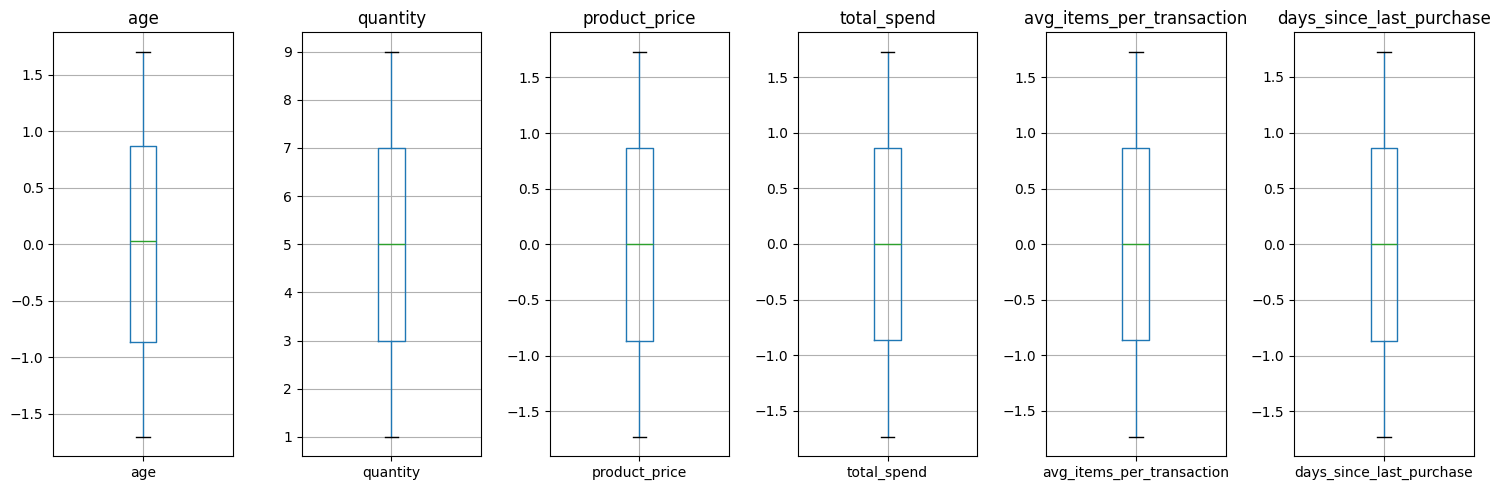

In [23]:
# Checking for outliers in numerical columns
cols = ['age','quantity','product_price', 'total_spend', 'avg_items_per_transaction', 'days_since_last_purchase']

# Plot all boxplots horizontally in one figure
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(15, 5))

# Iterate over columns and plot each boxplot
for i, col in enumerate(cols):
    df.boxplot(column=[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
